# GPU vs CPU: Why do you use GPU for deep learning number crunching

---

In this exercise, we are going to use TensorFlow and GPU for matrix multiplication. We will benchmark the running time for both CPUs and GPUs.

Most code is based on https://medium.com/@erikhallstrm/hello-world-tensorflow-649b15aed18c

Instructions:


* Make a copy of the notebook in your Google Drive (via the "File - Save a copy in Google Drive" option).
* rename your copy to "YourName-Copy Why GPU.ipynb"
* Select "GPU" via "Runtime - change runtime type - hardware accelerator"
* Run the notebook block by block, producing the results
* Answer the question at the bottom.
* Save the notebook by "File - Download .ipynb" to your local drive
* Make sure your results are also saved within the notebook
* Submit the sharable link to your colab notebook and the downloaded notebook to Canvas.





In [ ]:
# First, we import the right libraries
from __future__ import print_function
import matplotlib
import matplotlib.pyplot as plt
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import time

# here is the main subroutine
def get_times(maximum_time):
    device_times = {
        "/gpu:0":[],
        "/cpu:0":[]
    }
    matrix_sizes = range(50,5000,50)
    for size in matrix_sizes:
        for device_name in device_times.keys():

            print("####### Calculating on the " + device_name + " #######")

            shape = (size,size)
            data_type = tf.float16
            with tf.device(device_name):
                r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.matmul(r2, r1)


            with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
                    start_time = time.time()
                    result = session.run(dot_operation)
                    time_taken = time.time() - start_time
                    print(result)
                    device_times[device_name].append(time_taken)

            print(device_times)

            if time_taken > maximum_time:
                return device_times, matrix_sizes



Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# Now run the test
device_times, matrix_sizes = get_times(1.5)

####### Calculating on the /gpu:0 #######
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5

[[14.695 14.36  14.695 ... 12.86  13.33  13.28 ]
 [12.6   12.66  13.34  ... 12.445 11.4   13.4  ]
 [15.76  14.875 16.31  ... 13.69  12.91  14.53 ]
 ...
 [13.96  14.17  15.484 ... 14.36  13.23  13.81 ]
 [12.18  12.46  13.414 ... 11.75  11.44  12.695]
 [12.914 12.88  14.39  ... 12.46  12.31  12.984]]
{'/gpu:0': [0.22919607162475586], '/cpu:0': []}
####### Calculating on the /cpu:0 #######
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5

[[13.18  11.71  13.91  ... 12.6   12.86  14.016]
 [13.055 12.66  14.62  ... 13.3   13.44  15.586]
 [12.69  12.01  13.234 ... 12.016 13.29  12.97 ]
 ...
 [11.98  12.22  12.836 ... 12.54  12.945 13.78 ]
 [11.68  10.69  12.4   ... 11.38  12.52  12.195]
 [11.8   12.914 12.93  ... 11.93  

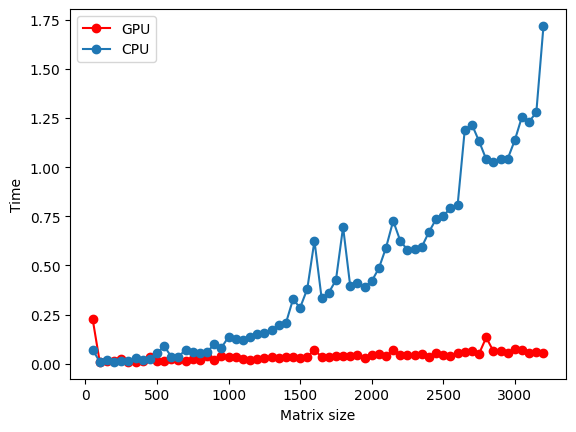

In [ ]:
# plotting
gpu_times = device_times["/gpu:0"]
cpu_times = device_times["/cpu:0"]

plt.plot(matrix_sizes[:len(gpu_times)], gpu_times, 'ro-',label='GPU')
plt.plot(matrix_sizes[:len(cpu_times)], cpu_times, 'o-',label='CPU')
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.legend(loc="upper left")
plt.show()
# view raw0-matrix.py hosted with ❤ by GitHub

As matrix size increases, the time taken to do the calculations increases exponentially for a CPU. However, while there is some initial overhead for small matrix sizes, GPUs allow for matrix calculations to scale much more effectively, staying almost constant in this example. Since much of deep learning relies on the ability to make these matrix calculations at scale, the use of GPUs is much preferred.